# 1. Data Wrangling
## Importing libraries and relevant data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import stats
from scipy.stats import norm, skew

In [2]:
train_df=pd.read_csv('Datasets/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let us check the various features included in the dataframe.

In [3]:
train_df.columns.shape

(81,)

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

As we have seen, we have about 81 different features in the dataframe. Hence, it is extremely important to downsize the number of features for model fitting. More over we need to check how the various features are distributed here.

From the training dataframe, we are sure that we need to calculate the sale price of the various properties. Let us separate the sale price column.

# Data preprocessing and visualisation

In [5]:
target=pd.DataFrame(train_df.iloc[:,-1],columns=['SalePrice'])
target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Moreover, ID column has no use for training purpose. Hence, we can simply drop this column

In [6]:
train_df.drop('Id',axis=1,inplace=True)

Let us now check for any missing values that are present in the various features.

In [7]:
train_df.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

As we can clearly see, there are some particular features which require our attention  due to the presence of empty values. Let us see how many empty entries are present in these features.

In [8]:
missing=pd.DataFrame(train_df.isna().sum().sort_values(ascending=False)[0:19],columns=['Missing values'])
missing.reset_index(inplace=True)
missing.rename(columns={'index':'Feature name'},inplace=True)


In [9]:
missing

,Feature name,Missing values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageCond,81
8,GarageFinish,81
9,GarageQual,81


Let us visualise the above as barplots for better understanding.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

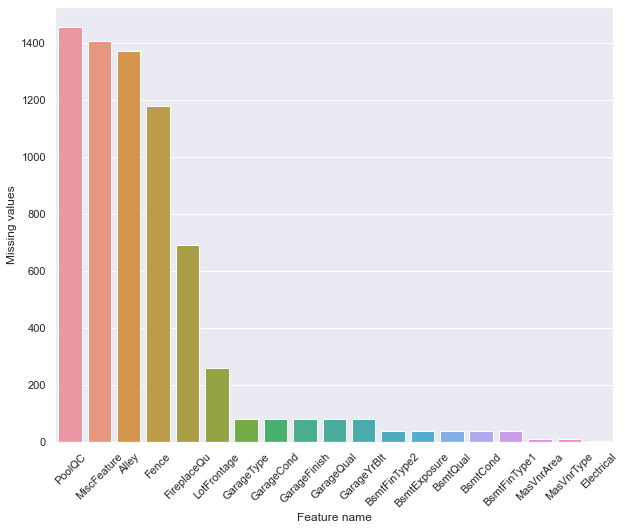

In [10]:
plt.figure(figsize=(10,8))
sns.barplot('Feature name','Missing values',data=missing)
plt.xticks(rotation=45)

As it can be clearly seen, we have extremely high number of missing values that have to be taken care of.

### Target variable distribution

Let us also check how is the target variable distributed for us. 

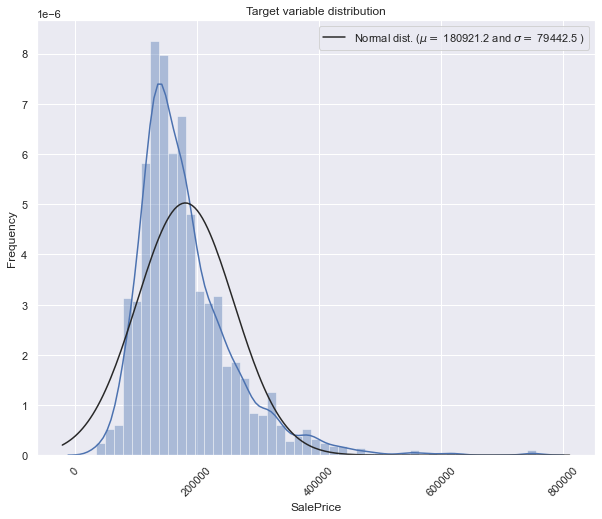

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(target['SalePrice'],fit=norm);
(mu, dev) = norm.fit(target['SalePrice'])
plt.xticks(rotation=45)
mu=np.round(target['SalePrice'].mean(),2)
dev=np.round(target['SalePrice'].std(),2)
plt.title('Target variable distribution')
plt.ylabel('Frequency')
plt.legend(['Normal dist. ($\mu=$ {} and $\sigma=$ {} )'.format(mu, dev)])

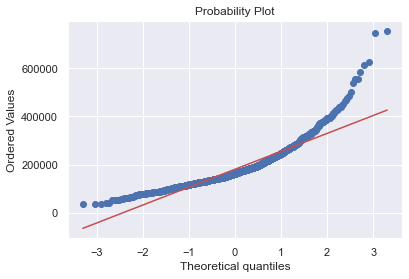

In [12]:
fig = plt.figure()
res = stats.probplot(target['SalePrice'], plot=plt)
plt.show()

A scipy probplot generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

If the blue and red line are on the same linear path at 45 degrees, we can confirm that our data is normally distributed.

From the above distplot, it is clearly visible that the data is right skewed and hence, deviates from a normal distribution. Moreover, the data deviates from a linear red line. Hence, we must do some preprocessing to somehow, convert our distribution into a normal distribution. This will also help us use a linear model for the  purpose of regression.


The reason for preprocessing to have a normal distribution is because most regression models perform far superior when it has a normally distributed data. Moreover, regression models such as the OLS linear model make the assumptions that it's residuals (or errors) are nomrally distributed in nature.  

To understand it better, this link below is helpful.

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

## Transforming the data into a normal distribution

### 1. Using power_transform

In [13]:
from sklearn.preprocessing import power_transform

We can use two different methods here. These are namely:

1. yeo-johnson: works with positive and negative values
2. box-cox: works with strictly postivie values

Let us check some more information on the SalePrice column

In [14]:
target['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As we can see, all values here are positive. Hence, we can use any of the power_transform methods here.

In [15]:
target['Box-cox']=power_transform(target['SalePrice'].values.reshape(-1,1),method='box-cox',standardize=False)

Text(0, 0.5, 'Frequency')

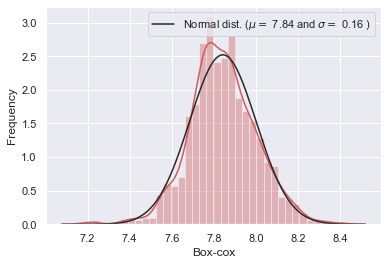

In [16]:
sns.distplot(target['Box-cox'],fit=norm,color='indianred')
(mu, dev) = norm.fit(target['Box-cox'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, dev)])
plt.ylabel('Frequency')

After checking the mean and standard deviation, it is clear that the distribution is normally distributed

Let us check if the residuals are normally distributed using the probplot of scipy

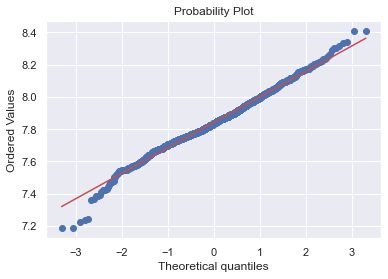

In [17]:
fig = plt.figure()
res = stats.probplot(target['Box-cox'], plot=plt)
plt.show()

As we can clearly see, our residuals are following the red line which basically means that they are normally distributed in nature. This is quite advatageous for model training purpose.

### 2. Logarithmic transformation

In this case, instead of using the sklearn power_transform feature, we manually convert our SalePrices using a numpy transformation as shown below.

Generally, for a non normal data with high skewdness, a log transformation reduces the skew and makes the data approximately normally distributed.

In [18]:
target['Log prices']=np.log(target['SalePrice'])

Text(0, 0.5, 'Frequency')

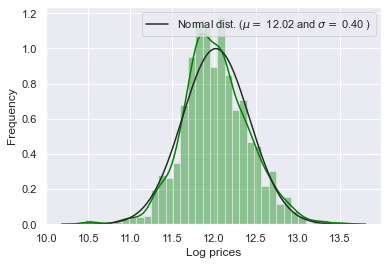

In [19]:
sns.distplot(target['Log prices'],fit=norm,color='green')
(mu, dev) = norm.fit(target['Log prices'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, dev)])
plt.ylabel('Frequency')

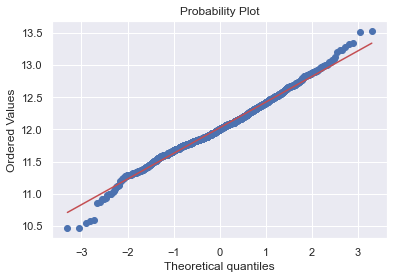

In [20]:
fig = plt.figure()
res = stats.probplot(target['Log prices'], plot=plt)
plt.show()

### 3. Min-Max transformation

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
target['Min-max']=scaler.fit_transform(target['SalePrice'].values.reshape(-1,1))

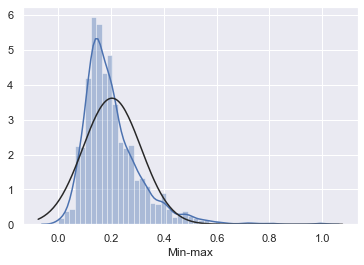

In [23]:
sns.distplot(target['Min-max'],fit=norm)

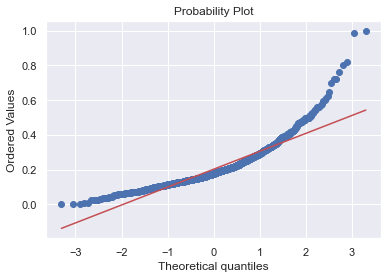

In [24]:
fig = plt.figure()
res = stats.probplot(target['Min-max'], plot=plt)
plt.show()

As it can be clearly seen, the min-max transformation failed to normalise the results.

### 4. Robust Scaler

In [25]:
from sklearn.preprocessing import RobustScaler

In [26]:
rob=RobustScaler()
target['Robust scaler']=rob.fit_transform(target['SalePrice'].values.reshape(-1,1))

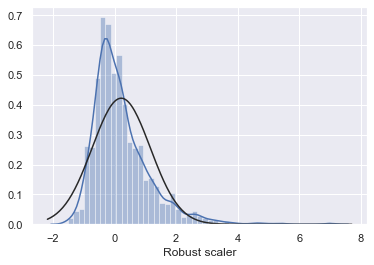

In [27]:
sns.distplot(target['Robust scaler'],fit=norm)

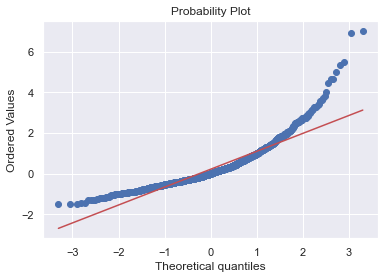

In [28]:
fig = plt.figure()
res = stats.probplot(target['Robust scaler'], plot=plt)
plt.show()

Clearly, the robust scaler failed to normalise our data aswell.

Hence, at the end, we can either select the power_transform or log transformation. Let us go ahead with the log transformation.

## Outlier detection for some features

Let us check the scatter plots of numerical data with sale prices. We know, traditionally, area of the house is a strong indicator of price. After going through the other data, another few features that could play an important role in price can be shown here.

* GrLivArea
* TotalBsmtSF
* YrSold
* OverQual
* GarageArea
* TotRmsAbvGrd
* YearBuilt


So, let us check their scatter plots and boxplots.

### A) GrLivArea Vs SalePrice

Text(0.5, 1.0, 'Sale price vs Living Area')

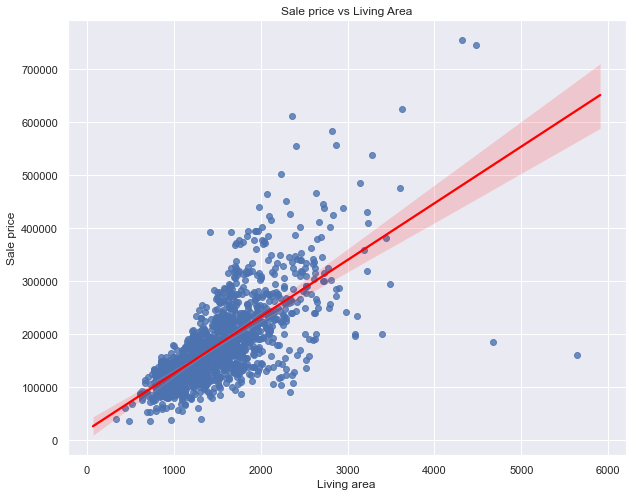

In [29]:
plt.figure(figsize=(10,8))
sns.regplot(train_df['GrLivArea'],target['SalePrice'],line_kws={"color": "red"})
plt.xlabel('Living area')
plt.ylabel('Sale price')
plt.title('Sale price vs Living Area')

Let us visualise the above data with boxplots.

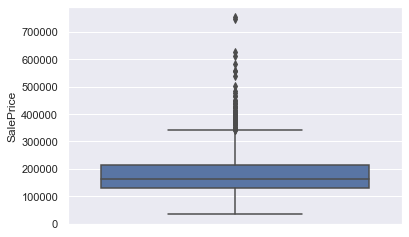

In [30]:
sns.boxplot(target['SalePrice'],orient='v')

In [31]:
target['SalePrice'].median()

163000.0

Let us drop the entries with outliers here. In our case, we will be dropping all the values that have a living area > 4500 sq feet and a sale price below 350000 will be dropped as this data is generating quite a lot of noise.

In [32]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4500) & (train_df['SalePrice']<350000)].index)

After dropping all these entries, we can make a regplot to see if the variations have reduced compared to what it was previously.

Text(0.5, 1.0, 'Sale price vs Living Area without outliers')

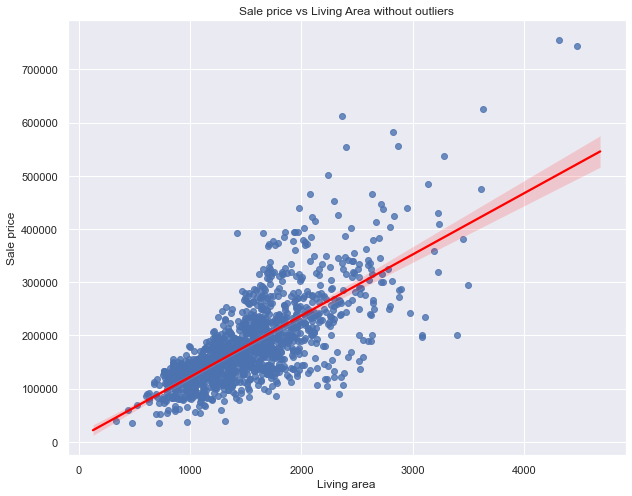

In [33]:
plt.figure(figsize=(10,8))
sns.regplot(train_df['GrLivArea'],train_df['SalePrice'],line_kws={"color": "red"})
plt.xlabel('Living area')
plt.ylabel('Sale price')
plt.title('Sale price vs Living Area without outliers')

As we can clearly see, the variation of the red line is much lesser now. This shows that the data has much lesser noise now.

### B) TotalBsmtSF Vs SalePrice

TotatBsmtSF feature tells us about the total basement area in square feet area. Let us check if there is enough correlation amongst saleprice and basement area.

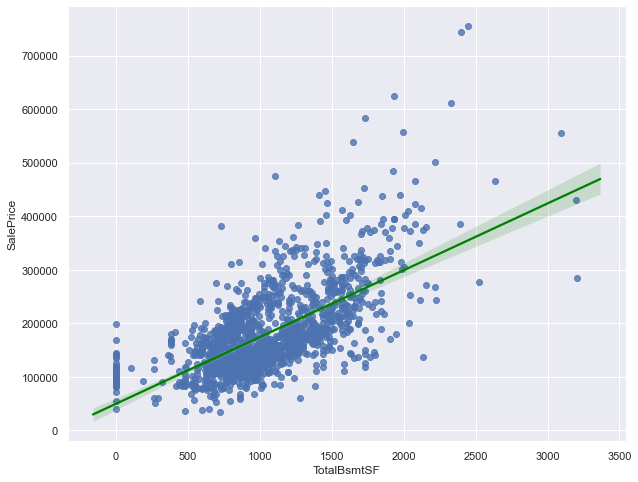

In [34]:
plt.figure(figsize=(10,8))
sns.regplot(train_df['TotalBsmtSF'],train_df['SalePrice'],line_kws={'color':'green'})

As we can clearly see, the outliers are little and hence, noise is not effecting the data much. It will be wise to not drop any data under these conditions. The general trend of the data seems to be linear aswell.

### C) YrSold Vs SalePrice

Let us see how the year the property was sold in affects the sale price. This would give us an idea if prices are increasing or reducing in recent years. However, this visualisation needs to be taken with a grain of salt as properties with varying feature values such as area will be compared with one another. However, this will give us a preliminary idea of how the sale prices are varying with each passing year.

We shall compare the  data using boxplots. 

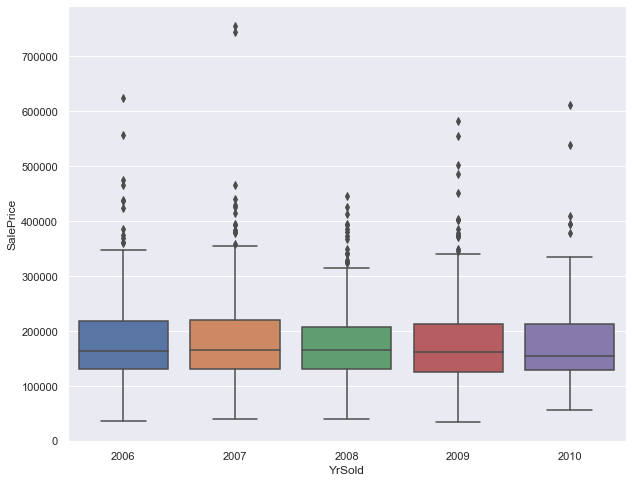

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot('YrSold','SalePrice',data=train_df)

As we can see from the boxplots, median prices of the properties have remained constant for all the years. 

### D) OverQual Vs SalePrice

Let us check how does the over all quality of the houses relate to the sale prices. For some background, the numbers given to overquality maybe read as follows:

      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Text(0.5, 1.0, 'Overall quality Vs Sale prices')

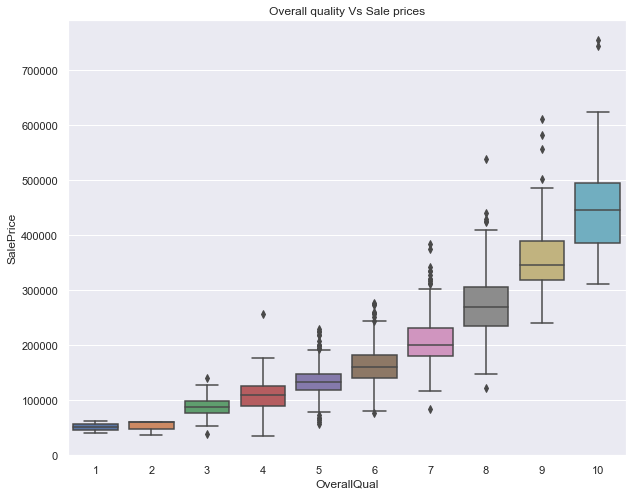

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot('OverallQual','SalePrice',data=train_df)
plt.title('Overall quality Vs Sale prices')

As was expected, with higher overall quality of the property, median prices of the properties are increasing.

### E) Garage area Vs SalePrice

Let us check if garage area is correlated to sale prices in any way.

Text(0.5, 1.0, 'Gara area vs Sale price')

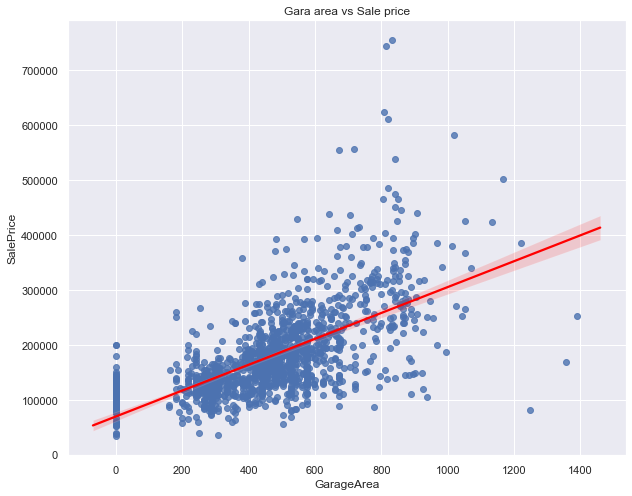

In [37]:
plt.figure(figsize=(10,8))
sns.regplot('GarageArea','SalePrice',data=train_df,line_kws={'color':'red'})
plt.title('Gara area vs Sale price')

As we can see, we have a few outliers here that should take care of. Upon eyeballing at the data, we can see that there are cases where for very large garage area, the price is too low. Similary, we have cases with extremely high prices even with avaerage garage area. Let us drop some of these entries and check the plot again.

In [38]:
train_df=train_df.drop(train_df[(train_df['GarageArea']>1200)&(train_df['SalePrice']<300000)].index)

In [39]:
train_df=train_df.drop(train_df[(train_df['GarageArea']>600)&(train_df['GarageArea']<1000)&(train_df['SalePrice']>550000)].index)

Let us now check the regplot after removing some of the outliers.

(0.0, 700000.0)

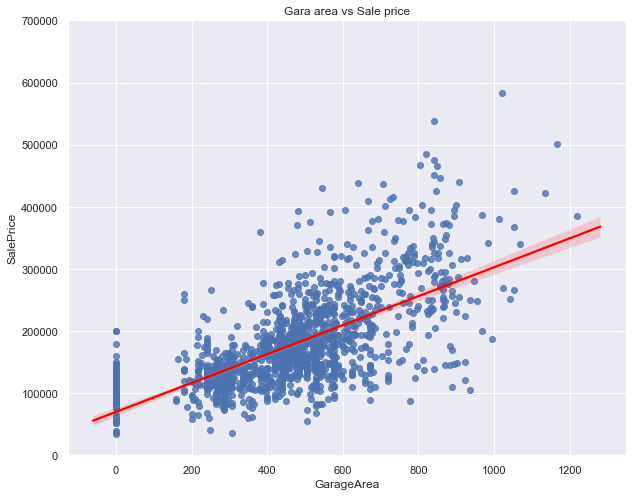

In [40]:
plt.figure(figsize=(10,8))
sns.regplot('GarageArea','SalePrice',data=train_df,line_kws={'color':'red'})
plt.title('Gara area vs Sale price')
plt.ylim(0,700000)

The data looks far cleaner now with slightly lower variance to the linear regression line.

### F) TotRmsAbvGrd Vs SalePrice

Let us check if there is any correlation between total rooms above ground and sale price

Text(0.5, 1.0, 'Total rooms above ground Vs Sale Price')

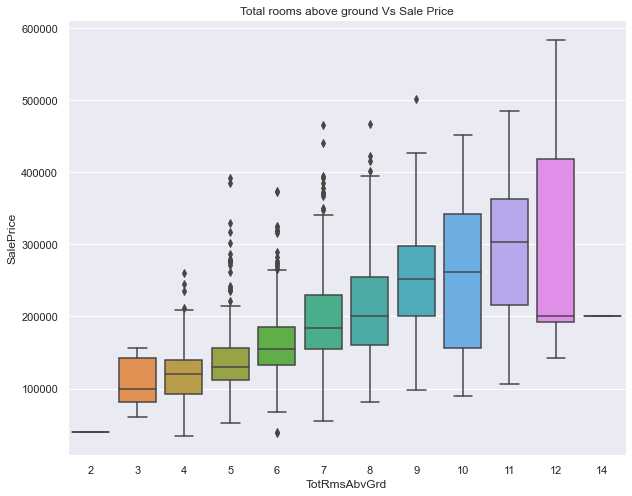

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot('TotRmsAbvGrd','SalePrice',data=train_df)
plt.title('Total rooms above ground Vs Sale Price')

The general trend is that as number of rooms increase above ground, median sale prices increase. Most houses have about 3-7 rooms above ground. Data for more than 7 rooms is low and hence, we can find a lot of variance in the data. However, this indicates that there is somewhat of a linear relation between total rooms and sale price.

### G) YearBuilt Vs SalePrice

Let us check if the year in which, the house was built has any correlation with sale price.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

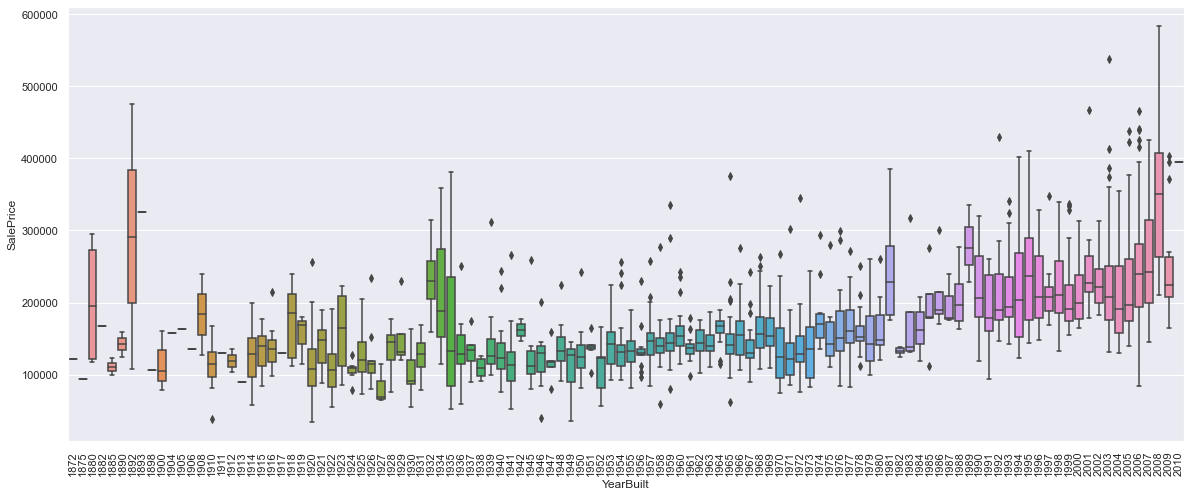

In [42]:
plt.figure(figsize=(20,8))
sns.boxplot('YearBuilt','SalePrice',data=train_df)
plt.xticks(rotation=90)

Although the correlation is a little weak, it can be said that houses built 1983 seems to have higher median prices with each passing year.

However, there are extremely high number of features that have to be checked manually. We could reduce all this work using a correlation heat map to check which features may be of particular interest to us.

## Correlation heat map

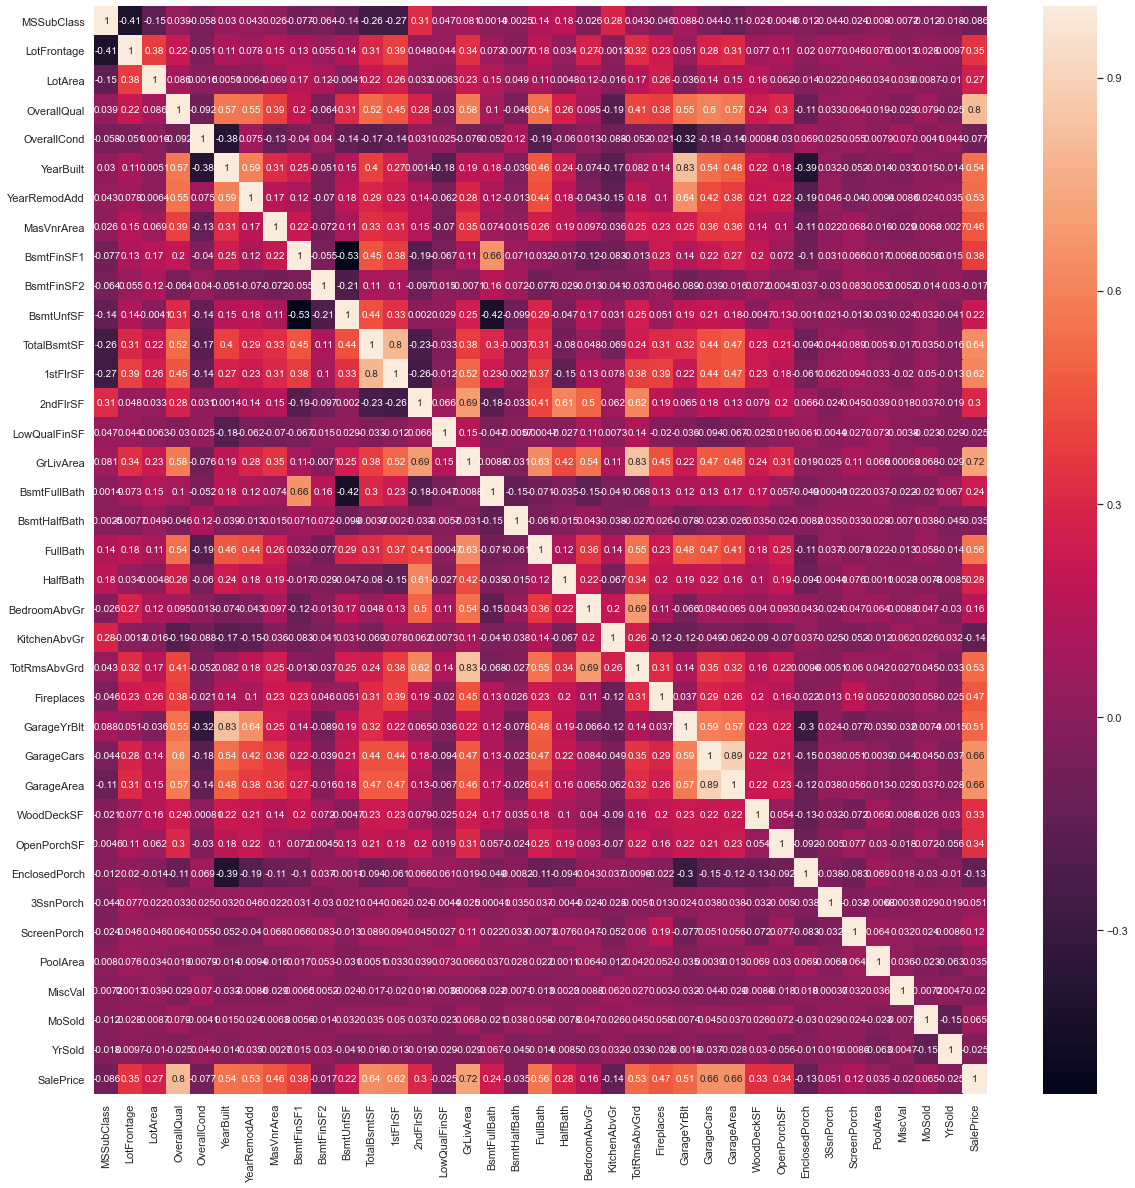

In [43]:
corr=train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

As we can clearly see from the last row of the heatmap, some features are highly correlated while some are not. Infact, we should take care of possible multicollinearity in the data. Some data like Garage cars, Garage area show similar correlations. Hence, we can safely remove these features.

Let us check the top 10 most correlated features with sale price.

In [44]:
k=10
cols=corr.nlargest(k,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

Hence, the features above are the most highly correlated. Let us make a smaller heatmap for the above.

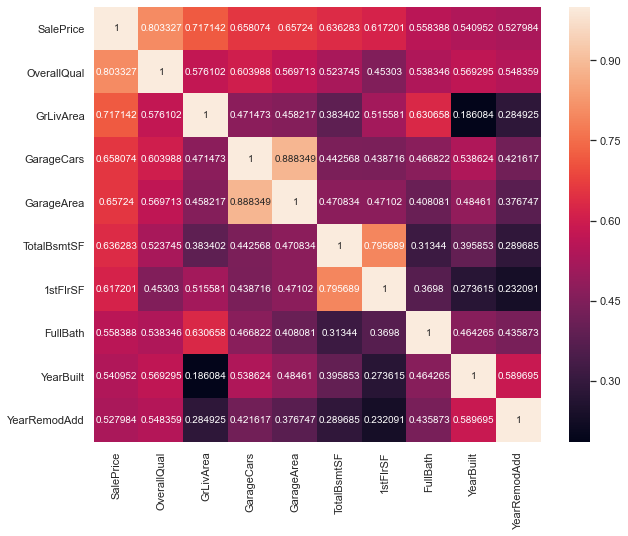

In [45]:
corr_highest=train_df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_highest,annot=True,fmt='g')

Some of the important conclusions that could be drawn are:

* Features like GarageCars and GarageArea show the same data. More cars would mean more garage area.
* GrLivArea and 1stFlrSF should show the same results since 1st, 2nd or any other higher floors can be only as big as the ground floor area.

Out of all these important correlations, we are yet to visualise how FullBath and YearRemodAdd correlates with SalePrice.

The full bath feature tells us the number of bathrooms present which are above the ground floor.

### G) FullBath Vs SalePrice

Text(0.5, 1.0, 'SalePrice Vs Full bath')

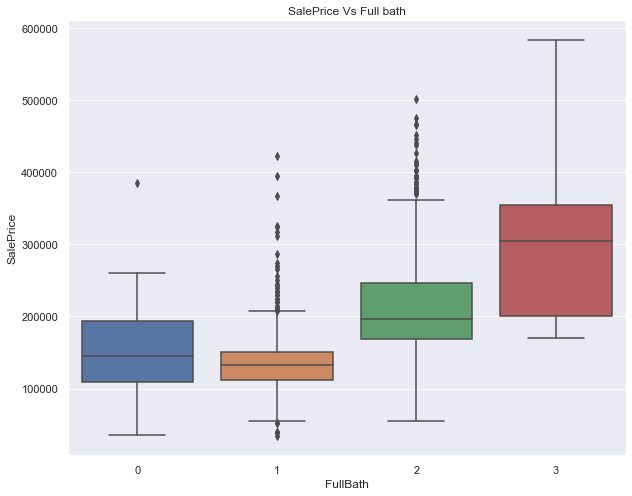

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot(train_df['FullBath'],train_df['SalePrice'])
plt.title('SalePrice Vs Full bath')

Let us neglect the case where there are no full baths above ground (i.e. FullBath=0)

For other cases, it can be seen that the median prices are increasing as number of bathrooms above the ground floor is rising.

### H) YearRemodAdd Vs SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

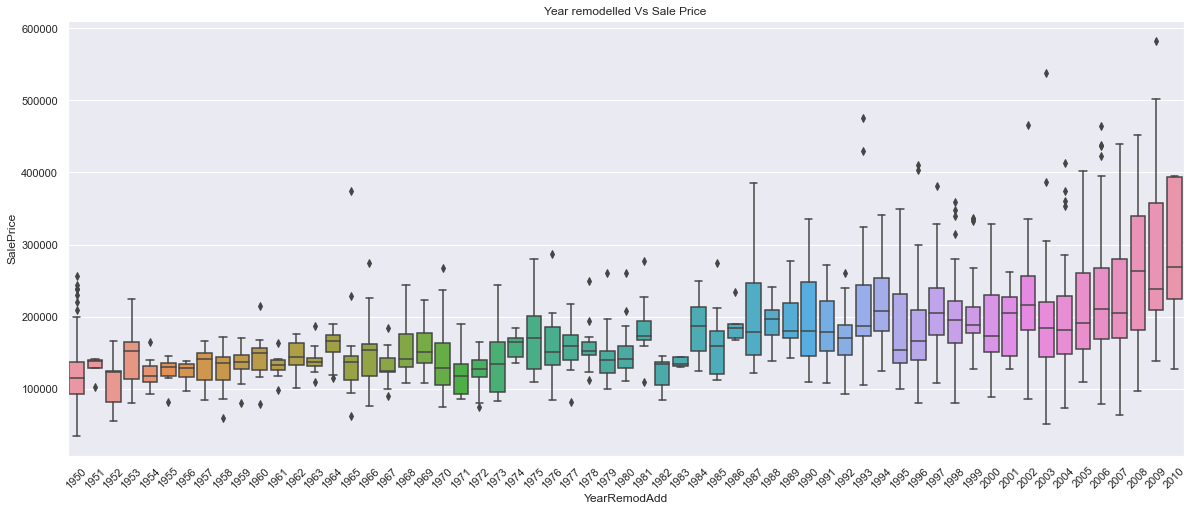

In [47]:
plt.figure(figsize=(20,8))
sns.boxplot(train_df['YearRemodAdd'],train_df['SalePrice'])
plt.title('Year remodelled Vs Sale Price')
plt.xticks(rotation=45)

As the remodelled year is more recent, median sale prices are increasing. This confirms the well known fact that as the property has been remodelled in the recent past, it's prices will be higher.

## Processing the missing values

In any machine learning model, we need to take care of the missing values. Let us check the presence of missing values in the features that we are planning to use in our models.

In [48]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
train_df.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

As we can see, quite a features have no missing values and hence, requires no intervention. Let us take care of the features that have missing values. Each feature requires different treatment. Let us start.

### A) LotFrontage

In [50]:
train_df['LotFrontage'].describe()

count    1191.000000
mean       69.518892
std        22.964776
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

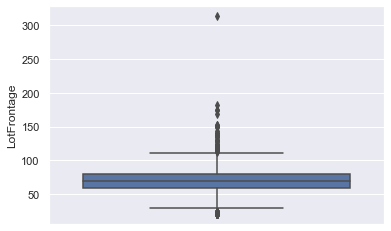

In [51]:
sns.boxplot(train_df['LotFrontage'],orient='v')

Due to the presence of outliers, it will be wise to fill the missing values with median value as shown below.

In [52]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(),inplace=True)

### B) Alley

In [53]:
train_df['Alley'].isna().value_counts()

True     1358
False      91
Name: Alley, dtype: int64

According to the provided data, 1358 properties have missing values. According to the data description, missing values means there is no alley access. Hence, we shall fill the missing values with "None" 

In [54]:
train_df['Alley'].fillna('None',inplace=True)

### C)  MasVnrType

In [55]:
train_df['MasVnrType'].isna().value_counts()

False    1441
True        8
Name: MasVnrType, dtype: int64

Only 8 entries have missing values.

In [56]:
train_df['MasVnrType'].value_counts()

None       862
BrkFace    442
Stone      122
BrkCmn      15
Name: MasVnrType, dtype: int64

In [57]:
train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0],inplace=True)

We have filled all missing values with the most common (or mode) of this feature.

### D) MasVnrArea

In [58]:
train_df['MasVnrArea'].isna().value_counts()

False    1441
True        8
Name: MasVnrArea, dtype: int64

In [59]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(),inplace=True)

### E) 'BsmtQual' ,'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'

For all the basement features, missing values actually means there are no basements. Hence, missing values will be replaced by none.

In [60]:
basement_features=['BsmtQual' ,'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for feature in basement_features:
    train_df[feature]=train_df[feature].fillna('None')

In [61]:
train_df['BsmtQual'].isna().value_counts()

False    1449
Name: BsmtQual, dtype: int64

In [62]:
train_df['BsmtQual'].value_counts()

TA      647
Gd      618
Ex      112
None     37
Fa       35
Name: BsmtQual, dtype: int64

### F) Electrical

All properties should have electrical connections as a mandatory facility. Hence, it is odd to see any empty values in this feature. Let us check how many empty values are there.

In [63]:
train_df['Electrical'].isna().value_counts()

False    1448
True        1
Name: Electrical, dtype: int64

As expected, we have only one single value with an empty value. This could be due to a mistake in entering the data. Hence, we will fill this value with the most common data under this feature.

In [64]:
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)

### G) FireplaceQu, GarageType, GarageYrBlt,GarageFinish ,GarageQual,GarageCond ,PoolQC,Fence,                         MiscFeature 

For all the above features, missing values denotes that this feature is not present in the property. This has been clearly mentioned in the data description. Hence, we replace the empty values as "None"

In [65]:
misc_features=['FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish' ,
               'GarageQual','GarageCond' ,'PoolQC','Fence','MiscFeature' ]

In [66]:
for misc in misc_features:
    train_df[misc].fillna('None',inplace=True)

After all this is done, we should not expect anymore missing values in the dataframe. Let us check once more to confirm.

In [67]:
train_df.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF   

### Ordinal encoding the catergorical features

In [68]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [69]:
cat_features=['FireplaceQu', 'BsmtQual', 'BsmtCond','GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [70]:
for cat in cat_features:
    train_df[cat]=oe.fit_transform(train_df[cat].values.reshape(-1,1))
    

In [71]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5.0,RL,65.0,8450,1.0,1.0,3.0,Lvl,AllPub,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,4.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2.0,4.0,PConc,2.0,4.0,3.0,2.0,706,6.0,0,150,856,GasA,0.0,1.0,SBrkr,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,Attchd,2003,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,None,0,1.0,2.0,WD,Normal,208500
1,0.0,RL,80.0,9600,1.0,1.0,3.0,Lvl,AllPub,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,6,7.0,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3.0,4.0,CBlock,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,GasA,0.0,1.0,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,Attchd,1976,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,4.0,None,0,4.0,1.0,WD,Normal,181500
2,5.0,RL,68.0,11250,1.0,1.0,0.0,Lvl,AllPub,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,4.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2.0,4.0,PConc,2.0,4.0,2.0,2.0,486,6.0,0,434,920,GasA,0.0,1.0,SBrkr,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,Attchd,2001,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,4.0,None,0,8.0,2.0,WD,Normal,223500
3,6.0,RL,60.0,9550,1.0,1.0,0.0,Lvl,AllPub,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,7,4.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3.0,4.0,BrkTil,4.0,1.0,3.0,0.0,216,6.0,0,540,756,GasA,2.0,1.0,SBrkr,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,Detchd,1998,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,4.0,None,0,1.0,0.0,WD,Abnorml,140000
4,5.0,RL,84.0,14260,1.0,1.0,0.0,Lvl,AllPub,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,8,4.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2.0,4.0,PConc,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,GasA,0.0,1.0,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,Attchd,2000,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,4.0,None,0,11.0,2.0,WD,Normal,250000


Let us drop the garage year built feature since it isn't giving us much information that will help us predict sale price

In [72]:
train_df.drop('GarageYrBlt',axis=1,inplace=True)

### One hot encoding the remaining categorical data

In [73]:
train_df=pd.get_dummies(train_df)

Upon doing the above operation, we must now have all the data in either int or float form. Let us take a quick look if it is indeed the case.

In [74]:
train_df.dtypes

MSSubClass               float64
LotFrontage              float64
LotArea                    int64
Street                   float64
Alley                    float64
LotShape                 float64
LandSlope                float64
OverallQual                int64
OverallCond              float64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                float64
ExterCond                float64
BsmtQual                 float64
BsmtCond                 float64
BsmtExposure             float64
BsmtFinType1             float64
BsmtFinSF1                 int64
BsmtFinType2             float64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
HeatingQC                float64
CentralAir               float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBa

As we can see, all the given data is now in numerical form. We should now separate the target feature which is the SalePrice from the training dataframe.

In [75]:
target_df=pd.DataFrame(train_df['SalePrice'],columns=['SalePrice'])
target_df.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [76]:
train_df.drop('SalePrice',axis=1,inplace=True)

In [77]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.0,65.0,8450,1.0,1.0,3.0,0.0,7,4.0,2003,2003,196.0,2.0,4.0,2.0,4.0,3.0,2.0,706,6.0,0,150,856,0.0,1.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,0,1.0,2.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

The above dataframe is now ready for machine learning purpose. However, as we will be utilising a few linear models, it is important for us to use standard scaler in our dataframe. This will help us give equal important to the features.

### Standard scaling the input data

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()
X_scaled_input=scaler.fit_transform(train_df)

### Log transforming the target data

In [80]:
target_df['LogSalePrice']=np.log(target_df['SalePrice'])
target_df.head()

,SalePrice,LogSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


# 2. Machine Learning

## Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics.regression import r2_score,explained_variance_score
from sklearn.model_selection import train_test_split

In [82]:
reg_lin=LinearRegression()

In [83]:
X=train_df
y=target_df['LogSalePrice'].values.astype(float)

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
reg_lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred=reg_lin.predict(X_test)

In [87]:
reg_lin.score(X_train,y_train)

0.9469422810158562

In [88]:
reg_lin.score(X_test,y_test)

0.8956324805461561

In [89]:
lin_pred_df=pd.DataFrame(columns=['Actual values','Predicted values'])

In [90]:
lin_pred_df['Actual values']=np.exp(y_test)
lin_pred_df['Predicted values']=np.exp(y_pred)
lin_pred_df['Absolute difference']=abs(lin_pred_df['Actual values']-lin_pred_df['Predicted values'])
lin_pred_df['Residual']=lin_pred_df['Actual values']-lin_pred_df['Predicted values']
lin_pred_df.head()

,Actual values,Predicted values,Absolute difference,Residual
0,66500.0,102121.410506,35621.410506,-35621.410506
1,164000.0,151998.949694,12001.050306,12001.050306
2,274970.0,241039.769868,33930.230132,33930.230132
3,266000.0,262114.414311,3885.585689,3885.585689
4,415298.0,376955.048984,38342.951016,38342.951016


In [91]:
lin_pred_df['Residual'].describe()

count       435.000000
mean        373.401507
std       20038.552547
min      -89661.384091
25%       -9273.256789
50%         592.037771
75%       10653.370959
max      115303.775078
Name: Residual, dtype: float64

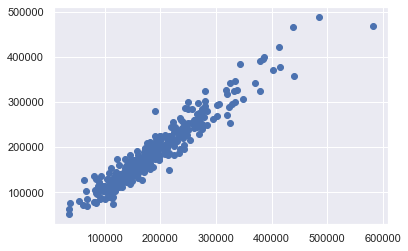

In [92]:
plt.scatter(lin_pred_df['Actual values'],lin_pred_df['Predicted values'])

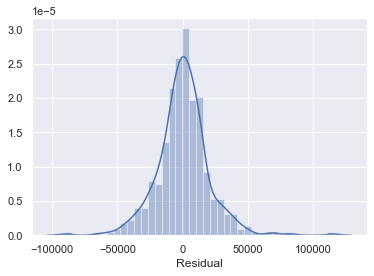

In [93]:
sns.distplot(lin_pred_df['Residual'])

The residuals seem to be normally distributed which is a good sign.

## Lasso Regression

In [94]:
reg_las=Lasso(alpha =0.0005, random_state=1,normalize=True)

In [95]:
reg_las.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
y_pred=reg_las.predict(X_test)

In [97]:
reg_las.score(X_test,y_test)

0.89114178828071

In [98]:
reg_las.score(X_train,y_train)

0.9059321897758239

In [99]:
las_pred_df=pd.DataFrame(columns=['Actual values','Predicted values','Absolute difference'])
las_pred_df['Actual values']=np.exp(y_test)
las_pred_df['Predicted values']=np.exp(y_pred)
las_pred_df['Absolute difference']=abs(las_pred_df['Actual values']-las_pred_df['Predicted values'])
las_pred_df['Residual']=las_pred_df['Actual values']-las_pred_df['Predicted values']
las_pred_df['Difference %']=100*las_pred_df['Residual']/las_pred_df['Actual values']
las_pred_df

,Actual values,Predicted values,Absolute difference,Residual,Difference %
0,66500.0,104225.789937,37725.789937,-37725.789937,-56.730511
1,164000.0,160482.519440,3517.480560,3517.480560,2.144805
2,274970.0,192624.635683,82345.364317,82345.364317,29.947036
3,266000.0,255531.269474,10468.730526,10468.730526,3.935613
4,415298.0,331509.306327,83788.693673,83788.693673,20.175559
5,245350.0,240682.379366,4667.620634,4667.620634,1.902434
6,227000.0,216521.893619,10478.106381,10478.106381,4.615906
7,163000.0,159873.457633,3126.542367,3126.542367,1.918124
8,318000.0,293870.665245,24129.334755,24129.334755,7.587841
9,144000.0,136796.542556,7203.457444,7203.457444,5.002401


In [100]:
las_pred_df['Absolute difference'].describe()

count       435.000000
mean      15536.555482
std       17349.899429
min          64.793828
25%        5083.052621
50%       10647.496563
75%       20241.334970
max      192424.675323
Name: Absolute difference, dtype: float64

Let us check how the residuals are distributed.

Text(0.5, 1.0, 'Residual PDF')

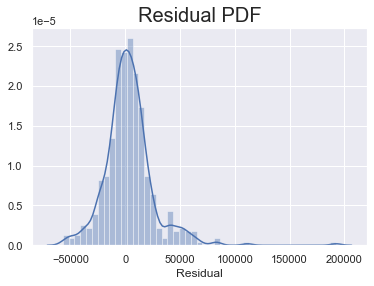

In [101]:

sns.distplot(las_pred_df['Residual'])
plt.title('Residual PDF',size=20)

Under best case scenario,our residuals should follow a normal distribution. This case is true. However, we do have a few extremely positive values in the residuals where the model didn't perform too well. This indicates room for model improvement.


Let us see the scatter plot of predicted vs actual results to get an idea of how the model is performing.

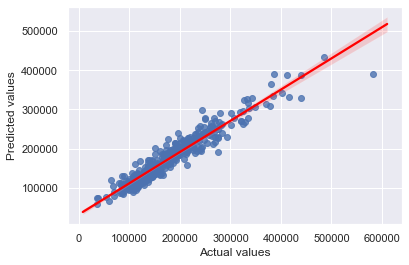

In [102]:
sns.regplot(las_pred_df['Actual values'],las_pred_df['Predicted values'],line_kws={'color':'red'})

As we can see, the model is performing well upto the point where the prices are high. It has a tough time predicting correctly at this point.

Let us finally check the bias in our model.

In [103]:
bias=np.exp(reg_las.intercept_)
bias

613.3873030211097

## Ridge Regression

In [104]:
reg_rid=Ridge()

In [105]:
reg_rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
y_pred=reg_rid.predict(X_test)

In [107]:
reg_rid.score(X_train,y_train)

0.9458809224147076

In [108]:
reg_rid.score(X_test,y_test)

0.9008145447461406

In [109]:
r2_score(y_pred,y_test)

0.8794200775989619

In [110]:
explained_variance_score(y_pred,y_test)

0.8797195301555265

In [111]:
rid_df=pd.DataFrame(columns=['Actual values','Predicted values','Absolute difference'])
rid_df['Actual values']=np.exp(y_test)
rid_df['Predicted values']=np.exp(y_pred)
rid_df['Absolute difference']=abs(rid_df['Actual values']-rid_df['Predicted values'])
rid_df['Residual']=rid_df['Actual values']-rid_df['Predicted values']
rid_df['Difference %']=100*rid_df['Residual']/rid_df['Actual values']
rid_df

,Actual values,Predicted values,Absolute difference,Residual,Difference %
0,66500.0,100770.667488,34270.667488,-34270.667488,-51.534838
1,164000.0,151780.377318,12219.622682,12219.622682,7.450989
2,274970.0,224395.046249,50574.953751,50574.953751,18.392899
3,266000.0,261797.545055,4202.454945,4202.454945,1.579870
4,415298.0,371863.370449,43434.629551,43434.629551,10.458666
5,245350.0,231393.543607,13956.456393,13956.456393,5.688387
6,227000.0,212838.550016,14161.449984,14161.449984,6.238524
7,163000.0,168478.937439,5478.937439,-5478.937439,-3.361311
8,318000.0,322255.357565,4255.357565,-4255.357565,-1.338163
9,144000.0,131308.414397,12691.585603,12691.585603,8.813601


Text(0.5, 1.0, 'Residual PDF')

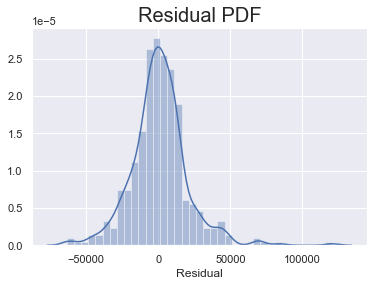

In [112]:
sns.distplot(rid_df['Residual'])
plt.title('Residual PDF',size=20)

The distribution of the residuals is normally distributed in Ridge regression which is better than what we got in Lasso regression.

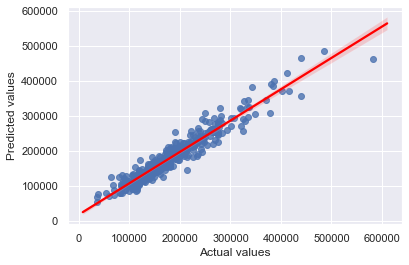

In [113]:
sns.regplot(rid_df['Actual values'],rid_df['Predicted values'],line_kws={'color':'red'})

## Ensemble models

### Random Forest Regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
X=train_df
y=target_df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [116]:
rfr=RandomForestRegressor()

In [117]:
rfr.fit(X_train,y_train)

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [118]:
y_pred=rfr.predict(X_test)

In [119]:
rfr.score(X_train,y_train)

0.970715670449613

In [120]:
rfr.score(X_test,y_test)

0.8743651466133188

In [121]:
rfr_df=pd.DataFrame(columns=['Actual values','Predicted values','Absolute difference'])
rfr_df['Actual values']=y_test
rfr_df['Predicted values']=y_pred
rfr_df['Absolute difference']=abs(rfr_df['Actual values']-rfr_df['Predicted values'])
rfr_df['Residual']=rfr_df['Actual values']-rfr_df['Predicted values']
rfr_df['Difference %']=100*rfr_df['Residual']/rfr_df['Actual values']
rfr_df

,Actual values,Predicted values,Absolute difference,Residual,Difference %
874,66500,106027.1,39527.1,-39527.1,-59.439248
483,164000,165021.8,1021.8,-1021.8,-0.623049
1423,274970,179462.4,95507.6,95507.6,34.733826
270,266000,244806.0,21194.0,21194.0,7.967669
278,415298,388258.7,27039.3,27039.3,6.510819
1166,245350,243605.6,1744.4,1744.4,0.710984
1015,227000,226240.0,760.0,760.0,0.334802
1171,163000,161865.0,1135.0,1135.0,0.696319
1115,318000,283398.5,34601.5,34601.5,10.880975
1424,144000,143055.0,945.0,945.0,0.656250


Text(0.5, 1.0, 'Residual PDF')

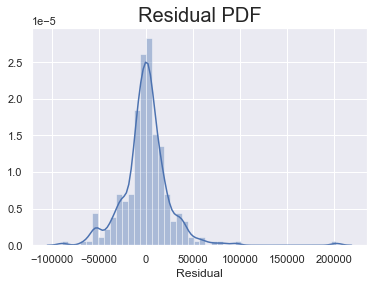

In [122]:
sns.distplot(rfr_df['Residual'])
plt.title('Residual PDF',size=20)

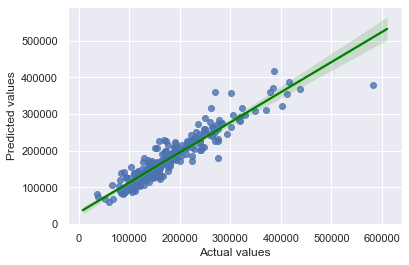

In [123]:
sns.regplot(rfr_df['Actual values'],rfr_df['Predicted values'],line_kws={'color':'green'})

### GBDT regressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
gbdt=GradientBoostingRegressor()

In [126]:
gbdt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
y_pred=gbdt.predict(X_test)

In [128]:
gbdt.score(X_train,y_train)

0.9685109644189283

In [129]:
gbdt.score(X_test,y_test)

0.9077084116842472

In [130]:
gbdt_df=pd.DataFrame(columns=['Actual values','Predicted values','Absolute difference'])
gbdt_df['Actual values']=y_test
gbdt_df['Predicted values']=y_pred
gbdt_df['Absolute difference']=abs(gbdt_df['Actual values']-gbdt_df['Predicted values'])
gbdt_df['Residual']=gbdt_df['Actual values']-gbdt_df['Predicted values']
gbdt_df['Difference %']=100*gbdt_df['Residual']/gbdt_df['Actual values']
gbdt_df

,Actual values,Predicted values,Absolute difference,Residual,Difference %
874,66500,93758.842250,27258.842250,-27258.842250,-40.990740
483,164000,155066.402886,8933.597114,8933.597114,5.447315
1423,274970,186540.406888,88429.593112,88429.593112,32.159724
270,266000,279591.240509,13591.240509,-13591.240509,-5.109489
278,415298,379922.907248,35375.092752,35375.092752,8.518002
1166,245350,263223.623490,17873.623490,-17873.623490,-7.284949
1015,227000,208610.094434,18389.905566,18389.905566,8.101280
1171,163000,152285.748984,10714.251016,10714.251016,6.573160
1115,318000,305370.705303,12629.294697,12629.294697,3.971476
1424,144000,134638.526519,9361.473481,9361.473481,6.501023


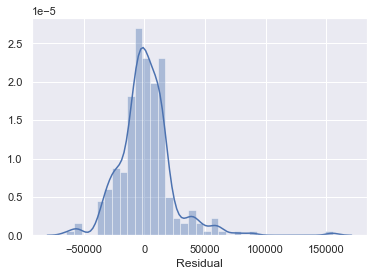

In [131]:
sns.distplot(gbdt_df['Residual'])

Residuals seem to be normally distributed with some skew in the positive direction.

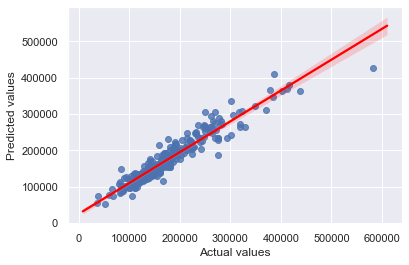

In [132]:
sns.regplot(gbdt_df['Actual values'],gbdt_df['Predicted values'],line_kws={'color':'red'})